PHẦN 1 – DATA CLEANSING & FEATURE ENGINEERING

1. Hàm load_data() và hiển thị 10 dòng đầu

In [2]:
import pandas as pd

def load_data(path):
    df = pd.read_csv(path)
    return df

# Load dữ liệu
df = load_data("titanic_disaster.csv")

# Hiển thị 10 dòng đầu
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


2. Kiểm tra dữ liệu thiếu & vẽ heatmap

a) Thống kê dữ liệu thiếu

In [5]:
# Kiểm tra số lượng dữ liệu thiếu
missing_data = df.isnull().sum()
print(missing_data)
(df.isnull().mean() * 100).sort_values(ascending=False)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


b) Vẽ Heatmap dữ liệu thiếu

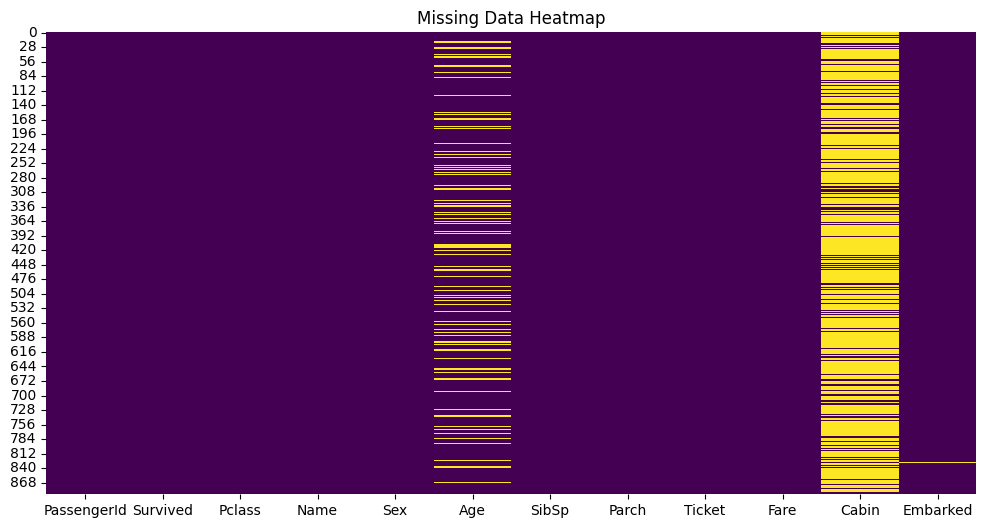

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()


c) Nhận xét

Age: thiếu khá nhiều dữ liệu.

Cabin: thiếu rất nhiều, đa số hành khách không có thông tin cabin.

Embarked: chỉ thiếu rất ít dữ liệu.

3. Tách cột Name → firstName & secondName

In [7]:
# Tách Name
df[['secondName', 'firstName']] = df['Name'].str.split(',', expand=True)

# Xóa cột Name
df.drop(columns=['Name'], inplace=True)

df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,secondName,firstName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


4. Rút gọn cột Sex (male → M, female → F)

In [8]:
df['Sex'] = df['Sex'].replace({
    'male': 'M',
    'female': 'F'
})

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,secondName,firstName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


5. Xử lý dữ liệu thiếu Age

a) Vẽ Boxplot theo hạng vé

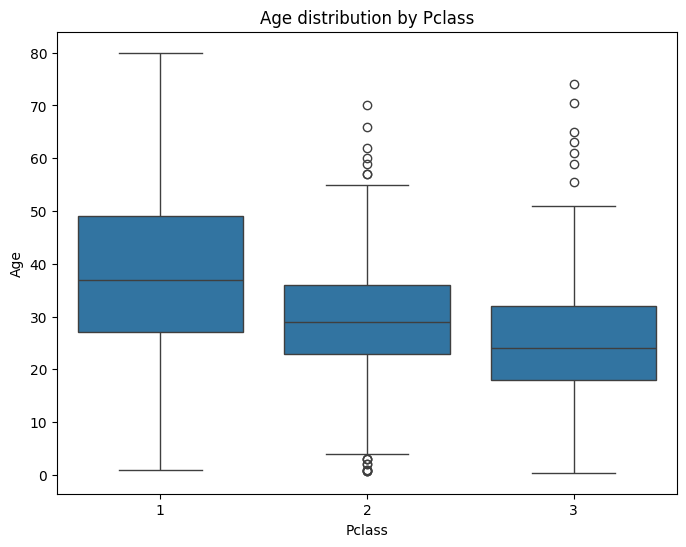

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age distribution by Pclass")
plt.show()


b) Nhận xét

Thông thường:

Hạng 1 (Pclass = 1) tuổi trung bình cao hơn

Hạng 3 thường trẻ hơn

Vì tuổi khác nhau theo hạng vé, nên không nên dùng trung bình toàn bộ.

c) Thay Age thiếu theo từng Pclass

In [10]:
# Tính tuổi trung bình theo Pclass
age_mean_by_class = df.groupby('Pclass')['Age'].mean()

# Hàm điền tuổi thiếu
def fill_age(row):
    if pd.isnull(row['Age']):
        return age_mean_by_class[row['Pclass']]
    return row['Age']

# Áp dụng
df['Age'] = df.apply(fill_age, axis=1)

df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


5b. Thay thế Age thiếu & trực quan lại bằng Heatmap

Điền tuổi thiếu theo từng hạng vé

In [13]:
# Tuổi trung bình theo Pclass
age_mean_by_class = df.groupby('Pclass')['Age'].mean()

def fill_age(row):
    if pd.isnull(row['Age']):
        return age_mean_by_class[row['Pclass']]
    return row['Age']

df['Age'] = df.apply(fill_age, axis=1)
df[['Pclass','Age']].head(10)


,Pclass,Age
0,3,22.00000
1,1,38.00000
2,3,26.00000
3,1,35.00000
4,3,35.00000
5,3,25.14062
6,1,54.00000
7,3,2.00000
8,3,27.00000
9,2,14.00000


Heatmap sau khi xử lý Age

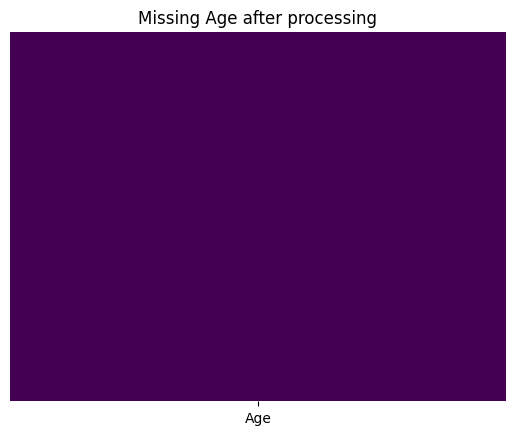

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[['Age']].isna(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
plt.title("Missing Age after processing")
plt.show()


6. Tạo biến AgeGroup

In [15]:
def age_group(age):
    if age <= 12:
        return "Kid"
    elif age <= 18:
        return "Teen"
    elif age <= 60:
        return "Adult"
    else:
        return "Older"

df['AgeGroup'] = df['Age'].apply(age_group)

df[['Age','AgeGroup']].head()


,Age,AgeGroup
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult


7. Tách danh xưng namePrefix

In [16]:
# Lấy prefix: Mr, Mrs, Miss...
df['namePrefix'] = df['secondName'].str.extract(' ([A-Za-z]+)\.')

df[['secondName','namePrefix']].head()


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-36888238.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['namePrefix'] = df['secondName'].str.extract(' ([A-Za-z]+)\.')


,secondName,namePrefix
0,Braund,NaN
1,Cumings,NaN
2,Heikkinen,NaN
3,Futrelle,NaN
4,Allen,NaN


8. Tạo biến familySize

In [17]:
df['familySize'] = 1 + df['SibSp'] + df['Parch']
df[['SibSp','Parch','familySize']].head()


,SibSp,Parch,familySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


9. Tạo biến Alone

In [18]:
df['Alone'] = df['familySize'].apply(lambda x: 1 if x == 1 else 0)


10. Tách loại cabin (typeCabin)

In [19]:
df['Cabin'] = df['Cabin'].fillna("Unknown")

df['typeCabin'] = df['Cabin'].str[0]

df[['Cabin','typeCabin']].head()


,Cabin,typeCabin
0,Unknown,U
1,C85,C
2,Unknown,U
3,C123,C
4,Unknown,U


11. Loại hành khách trùng giữa train và test

PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA

12. Tỉ lệ sống sót theo giới tính

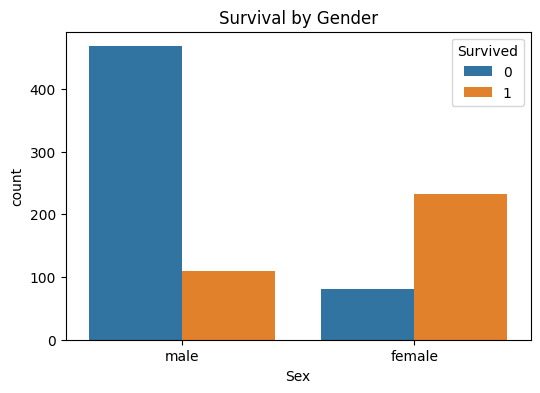

In [45]:
import pandas as pd
df = pd.read_csv("titanic_disaster.csv")
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()


13. Sống sót theo hạng vé (Pclass)

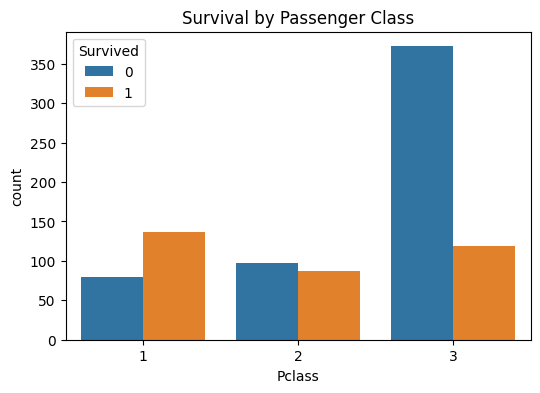

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()


14. Sống sót theo giới tính & nhóm tuổi

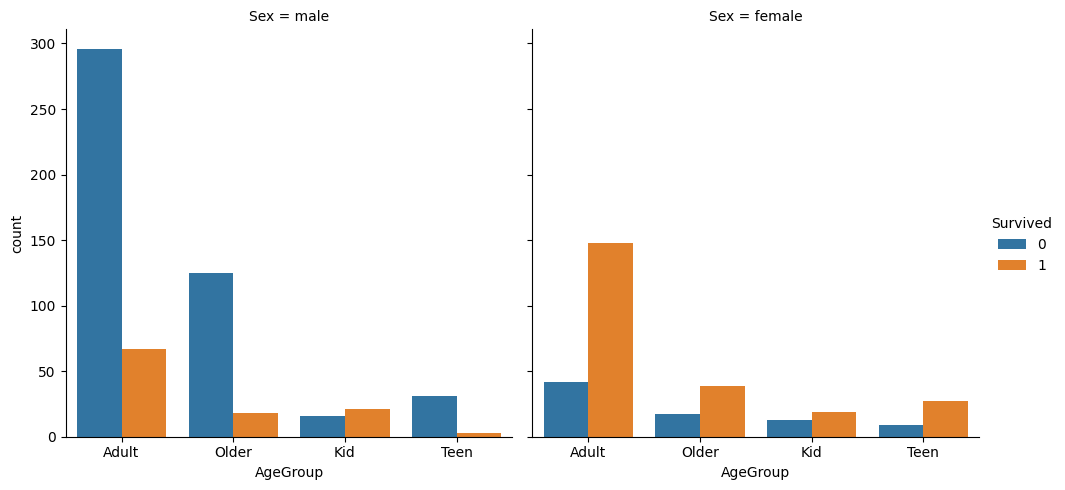

In [40]:
def age_group(age):
    if age <= 12:
        return "Kid"
    elif age <= 18:
        return "Teen"
    elif age <= 60:
        return "Adult"
    else:
        return "Older"

df['AgeGroup'] = df['Age'].apply(age_group)

sns.catplot(x="AgeGroup",
            hue="Survived",
            col="Sex",
            data=df,
            kind="count")

plt.show()


Nhận xét mẫu

Trẻ em có tỉ lệ sống cao hơn.

Người lớn chiếm số tử vong nhiều nhất do số lượng đông.

15. Xác suất sống sót theo số người đi cùng

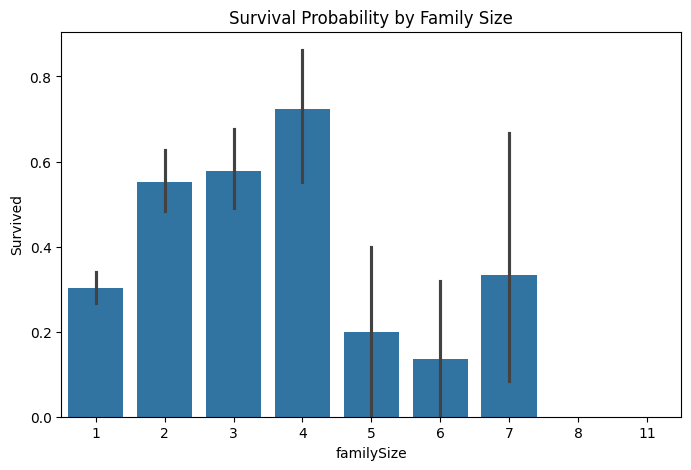

In [42]:
df['familySize'] = 1 + df['SibSp'] + df['Parch']
plt.figure(figsize=(8,5))
sns.barplot(x='familySize', y='Survived', data=df)
plt.title("Survival Probability by Family Size")
plt.show()


Nhận xét mẫu

Đi một mình hoặc nhóm nhỏ dễ sống sót hơn.

Gia đình quá đông có tỷ lệ sống thấp hơn.

16. Xác suất sống sót theo giá vé

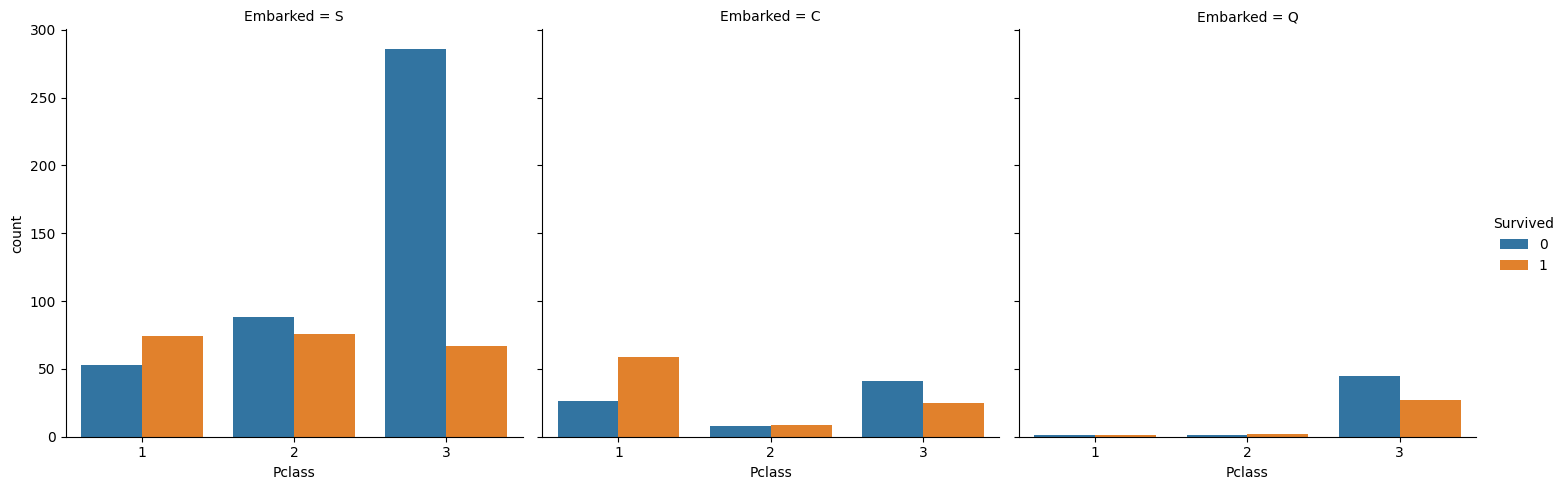

In [43]:
sns.catplot(x='Pclass',
            hue='Survived',
            col='Embarked',
            data=df,
            kind='count')

plt.show()


17. Sống sót theo Pclass và cảng lên tàu

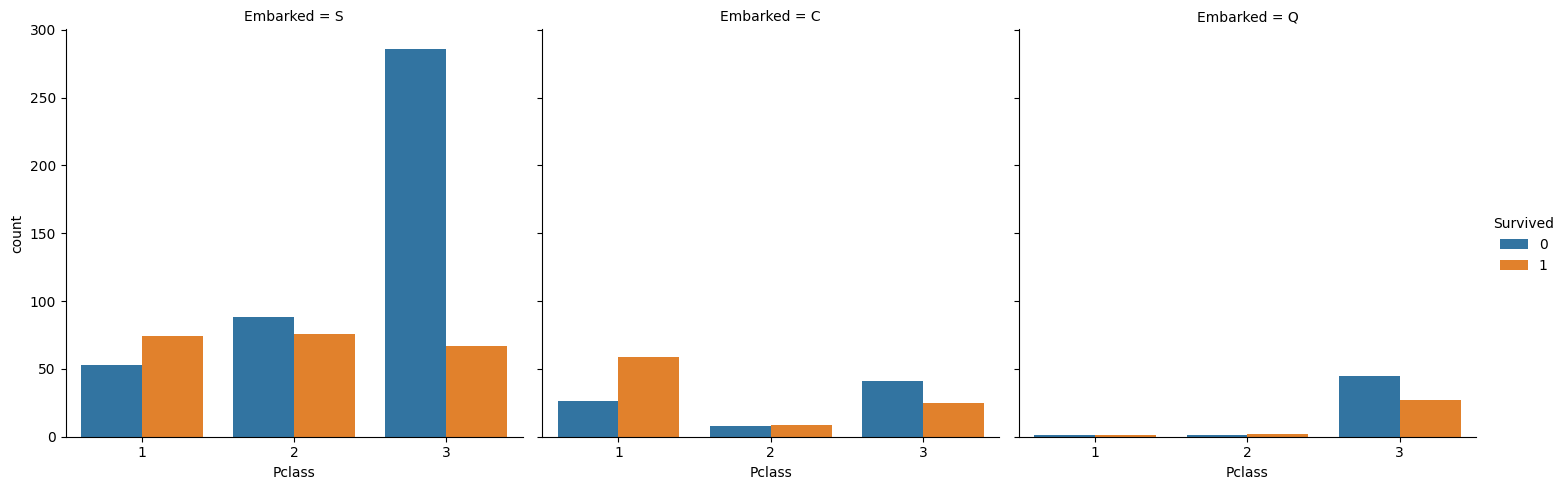

In [44]:
sns.catplot(x='Pclass',
            hue='Survived',
            col='Embarked',
            data=df,
            kind='count')

plt.show()
